Check Python version

In [52]:
!python --version

Python 3.11.11


Import libraries

In [1]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from darts import TimeSeries
from darts.datasets import ILINetDataset
from darts.utils.missing_values import missing_values_ratio, fill_missing_values

### **Extract Data**

In [3]:
# Through online Darts
series = ILINetDataset().load()
dataset = series.pd_dataframe().reset_index()
dataset.index.name = None

In [4]:
dataset.shape

(1305, 12)

In [5]:
dataset.columns

Index(['DATE', '% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS'],
      dtype='object', name='component')

In [6]:
dataset.head()

component       DATE  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 25-49  \
0         1997-10-12         1.10148          1.21686    179.0        NaN   
1         1997-10-19         1.20007          1.28064    199.0        NaN   
2         1997-10-26         1.37876          1.23906    228.0        NaN   
3         1997-11-02         1.19920          1.14473    188.0        NaN   
4         1997-11-09         1.65618          1.26112    217.0        NaN   

component  AGE 25-64  AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  \
0              157.0     205.0        NaN    29.0     570.0   
1              151.0     242.0        NaN    23.0     615.0   
2              153.0     266.0        NaN    34.0     681.0   
3              193.0     236.0        NaN    36.0     653.0   
4              162.0     280.0        NaN    41.0     700.0   

component  NUM. OF PROVIDERS  TOTAL PATIENTS  
0                      192.0         46842.0  
1                      191.0         48023.0  
2                      219.0         54961.0  
3                      213.0         57044.0  
4                      213.0         55506.0

In [7]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])

In [8]:
dataset.tail()

component       DATE  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 25-49  \
1300      2022-09-11         2.02422          1.94821  12548.0     6978.0   
1301      2022-09-18         2.03228          1.97359  13386.0     6709.0   
1302      2022-09-25         2.28328          2.20031  15904.0     6877.0   
1303      2022-10-02         2.36912          2.30242  16977.0     6869.0   
1304      2022-10-09         2.56561          2.56080  17521.0    10009.0   

component  AGE 25-64  AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  \
1300             NaN   13475.0     2701.0  2632.0   38334.0   
1301             NaN   14467.0     2599.0  2435.0   39596.0   
1302             NaN   16571.0     2633.0  2473.0   44458.0   
1303             NaN   16622.0     2764.0  2633.0   45865.0   
1304             NaN   18196.0     3716.0  3458.0   52900.0   

component  NUM. OF PROVIDERS  TOTAL PATIENTS  
1300                  3324.0       1967653.0  
1301                  3316.0       2006289.0  
1302                  3329.0       2020531.0  
1303                  3335.0       1992031.0  
1304                  3356.0       2065759.0

In [9]:
col_list = ['% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS']

In [10]:

series = TimeSeries.from_dataframe(dataset, 'DATE', col_list)
series_filled = fill_missing_values(series)
df_filled = series_filled.pd_dataframe().reset_index()

Define the required time and target columns

In [11]:
time_col = dataset.columns[0]
target_col = dataset.columns[-1]
dataset[time_col] = dataset[time_col].astype(str)

Change target column to float

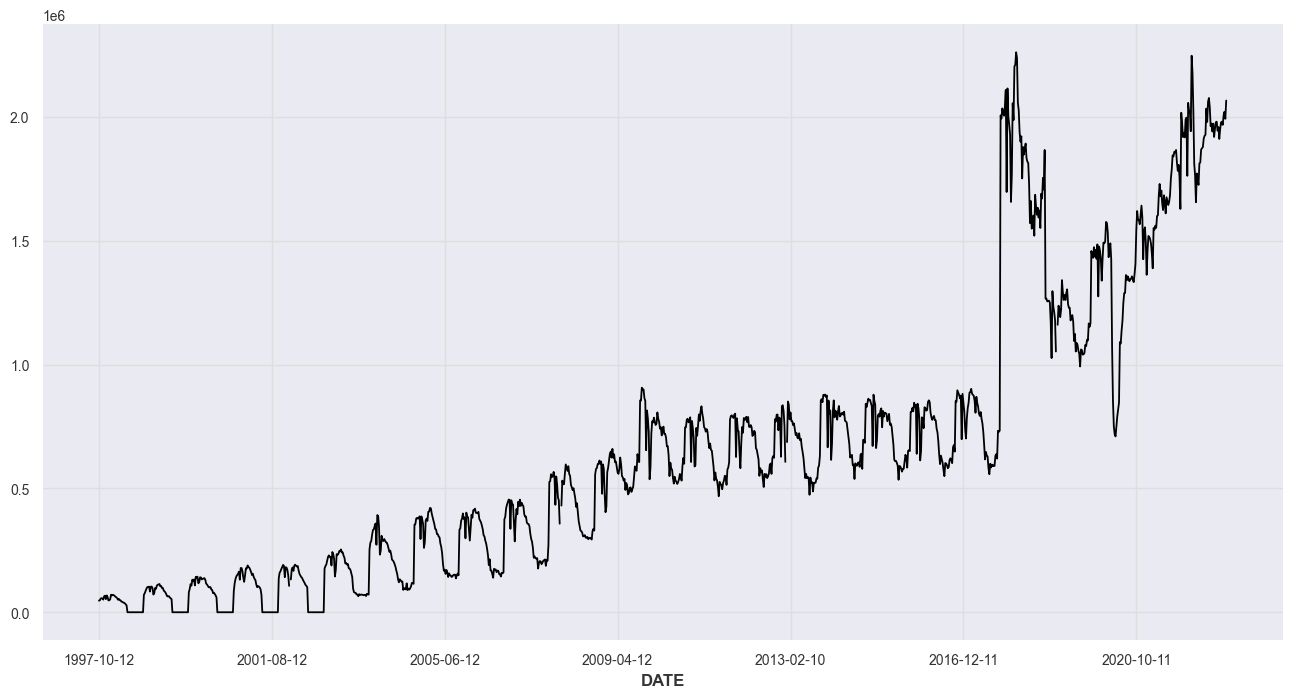

In [12]:
figsize = (16, 8)
dataset.set_index(time_col)[target_col].plot(figsize=figsize);

<Axes: xlabel='DATE'>

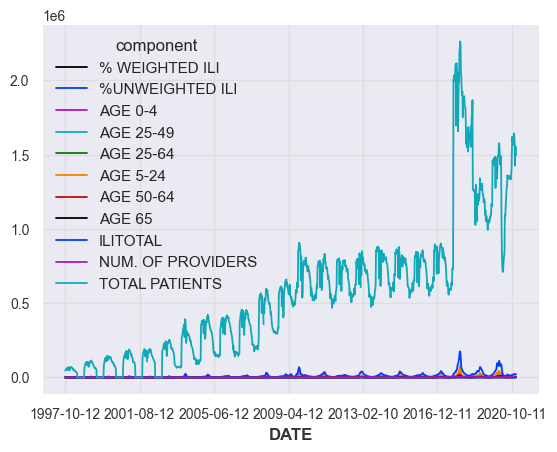

In [13]:
dataset[dataset.DATE < '2021'].set_index(time_col).plot()

<Axes: xlabel='DATE'>

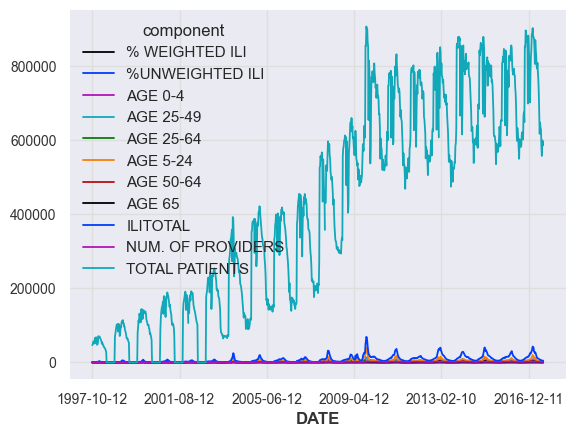

In [14]:
dataset[dataset.DATE < '2017-08'].set_index(time_col).plot()

In [15]:
# trim the anomaly part
dataset_partial = df_filled[df_filled.DATE < '2017-08']

In [16]:
dataset_partial

component       DATE  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 25-49  \
0         1997-10-12        1.101480         1.216860    179.0        0.0   
1         1997-10-19        1.200070         1.280640    199.0        0.0   
2         1997-10-26        1.378760         1.239060    228.0        0.0   
3         1997-11-02        1.199200         1.144730    188.0        0.0   
4         1997-11-09        1.656180         1.261120    217.0        0.0   
...              ...             ...              ...      ...        ...   
1029      2017-07-02        0.859531         0.961603   1771.0     1121.0   
1030      2017-07-09        0.818998         0.955818   1728.0     1111.0   
1031      2017-07-16        0.752505         0.827597   1545.0     1004.0   
1032      2017-07-23        0.731146         0.811886   1549.0      908.0   
1033      2017-07-30        0.733295         0.818527   1576.0      953.0   

component  AGE 25-64  AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  \
0              157.0     205.0        0.0    29.0     570.0   
1              151.0     242.0        0.0    23.0     615.0   
2              153.0     266.0        0.0    34.0     681.0   
3              193.0     236.0        0.0    36.0     653.0   
4              162.0     280.0        0.0    41.0     700.0   
...              ...       ...        ...     ...       ...   
1029          6090.0    1748.0      489.0   467.0    5596.0   
1030          6090.0    1564.0      505.0   418.0    5326.0   
1031          6090.0    1578.0      462.0   372.0    4961.0   
1032          6090.0    1421.0      450.0   419.0    4747.0   
1033          6090.0    1515.0      459.0   376.0    4879.0   

component  NUM. OF PROVIDERS  TOTAL PATIENTS  
0                      192.0         46842.0  
1                      191.0         48023.0  
2                      219.0         54961.0  
3                      213.0         57044.0  
4                      213.0         55506.0  
...                      ...             ...  
1029                  1422.0        581945.0  
1030                  1456.0        557219.0  
1031                  1405.0        599446.0  
1032                  1384.0        584688.0  
1033                  1377.0        596071.0  

[1034 rows x 12 columns]

In [17]:
dataset_partial['DATE'] = dataset_partial['DATE'].astype('str')

C:\Users\saira\AppData\Local\Temp\ipykernel_21184\1473158665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_partial['DATE'] = dataset_partial['DATE'].astype('str')


In [18]:
# dataset[target_col] = dataset[target_col].astype(float)

In [19]:
# dataset.head()

Split dataset into train and test sets

In [20]:
train_size = 0.9
train_points = int(train_size*len(dataset_partial))
train_df = dataset_partial.iloc[:train_points]
test_df = dataset_partial.iloc[train_points:]

Plot graph

In [21]:
train_df['DATE'] = train_df['DATE'].astype('str')

C:\Users\saira\AppData\Local\Temp\ipykernel_21184\1870464413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['DATE'] = train_df['DATE'].astype('str')


### **Train API**

Train data: convert df to list-of-list

In [22]:
train_data = []
for value in train_df.values:
    train_data.append(list(value))

In [23]:
train_data[:2]

[['1997-10-12',
  1.10148,
  1.21686,
  179.0,
  0.0,
  157.0,
  205.0,
  0.0,
  29.0,
  570.0,
  192.0,
  46842.0],
 ['1997-10-19',
  1.20007,
  1.28064,
  199.0,
  0.0,
  151.0,
  242.0,
  0.0,
  23.0,
  615.0,
  191.0,
  48023.0]]

Custom Model Request (optional)

In [24]:
# Default model request
model_request = {
    'type': 'meta_wa',
    'scorers': ['smape', 'mase'],
    'params': {
        'preprocessors': [
            {'type': 'dartsimputer'},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_naive'},
            {'type': 'darts_seasonalnaive'},
            # {'type': 'darts_autotheta'},
            # {'type': 'darts_autoarima'},
            # {'type': 'darts_autoets'},
        ],
    },
}

# # Onboard NeuralProphet customized model request
# np_external_model_request = {
#     'params': {
#       'changepoints_range': 0.2,
#       'epochs': 2,
#       'growth': 'off'
#     },
#     'metrics': [],
#     'type': 'neuralprophet',
# }
# # np_external_model_request = None

user_value = 0.7
output_type = 'estimate'  # 'data', 'estimate'
mauq_external_params = {
    'problem_type': 'regression',
    'confidence_level': user_value,
    'output_type': output_type

}

deepsybil_external_model_request = {
    'type': 'meta_wa',  # 'meta_naive', 'meta_wa'
    'scorers': ['mase', 'smape'],
    'params': {
        'preprocessors': [
            # {'type': 'dartsimputer'},
            # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_rnn',
            #  'params': {
            #      'model': 'LSTM',
            #      'hidden_dim': 10,
            #      'n_rnn_layers': 3
            # }},
            # {'type': 'darts_tcn',
            #  'params': {
            #      'output_chunk_length': 52,
            #      'input_chunk_length': 104,                 
            #      'n_epochs': 20,
            # }},
            # {'type': 'darts_rnn',
            #  'params': {
            #      'model': 'LSTM',
            #      'hidden_dim': 10,
            #      'n_rnn_layers': 3
            # }},
            # {'type': 'darts_nlinear'},
            # {'type': 'darts_dlinear'},
            # {'type': 'darts_blockrnn'},
            {'type': 'darts_tsmixer',
             'params': {
                 'output_chunk_length': 52,
                 'input_chunk_length': 104,                 
                 'n_epochs': 20,
            }},
            #  {'type': 'darts_tide'}
        ],
    },
}


# # Customized model request
model_request = {
    'type': 'meta_wa',  # 'meta_naive', 'meta_wa'
    'scorers': ['mase', 'smape'],
    'params': {
        'preprocessors': [
            # {'type': 'dartsimputer'},
            # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            # {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_naive'},
            # {'type': 'darts_seasonalnaive'},
            # {'type': 'darts_autotheta'},
            # {'type': 'stats_autotheta'},
            # {'type': 'darts_autoets'},
            # {'type': 'stats_autoets'},
            # {'type': 'darts_autoarima'},
            # {'type': 'stats_autoarima'},
            # {'type': 'darts_autoces'},
            # {'type': 'darts_kalman'},
            # {'type': 'darts_catboost'},            
            # # {'type': 'darts_tbats'},
            # # {'type': 'darts_linearregression'},
            # {'type': 'darts_lightgbm',
            #  'params': {
            #      'lags': 12,
            #      'output_chunk_length': 6,
            #      'verbose': -1
            # }}
            # {'type': 'neuralprophet',
            #  'external_params': np_external_model_request
            # }  # Onboard NeuralProphet external service
            {'type': 'deepsybil',
             'external_params': deepsybil_external_model_request
            }  # Onboard NeuralProphet external service
        ],
        
    },
    'mauq_params':mauq_external_params,
}

This is for JSON model_request

In [25]:
# file_path = 'model_request.json'
# # For writing the model request to a json file
# with open(file_path, 'r') as file:
#     model_request = json.load(file)

This is for YAML model_request

In [26]:
# file_path = 'model_request.yaml'
# # For reading the model request from a yaml file
# with open(file_path, 'r') as file:
#     model_request = yaml.safe_load(file)

Train API JSON Payload

In [27]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [28]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [29]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [30]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [31]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 4min 42s


In [32]:
train_json_out = response.json()  # dict output
train_json_out

{'model': 'AgEDCFQjKwAAABAAZCMrAIAElf0gAAAAAAAAjA9tb2RlbHMucGlwZWxpbmWUjAhQaXBlbGluZZSTlCmBlH2UKIwMdHJhbnNmb3JtZXJzlF2UjAVtb2RlbJSMFG1vZGVscy5tb2RlbHdyYXBwZXJzlIwLTWV0YU1vZGVsV0GUk5QpgZR9lCiMC2Jhc2VfbW9kZWxzlF2UaAiMEERlZXBTWUJJTFdyYXBwZXKUk5QpgZR9lCiMD2RlZXBzeWJpbF9tb2RlbJSMG21vZGVscy5leHRlcm5hbC5yZXN0X21vZGVsc5SMCURlZXBTWUJJTJSTlIwRYmFzZV9tb2RlbF9jb25maWeUfZQojAR0eXBllIwHbWV0YV93YZSMB3Njb3JlcnOUXZQojARtYXNllIwFc21hcGWUZYwGcGFyYW1zlH2UKIwNcHJlcHJvY2Vzc29yc5RdlH2UaBmMDG1pbm1heHNjYWxlcpRzYYwLYmFzZV9tb2RlbHOUXZR9lChoGYwNZGFydHNfdHNtaXhlcpRoH32UKIwTb3V0cHV0X2NodW5rX2xlbmd0aJRLNIwSaW5wdXRfY2h1bmtfbGVuZ3RolEtojAhuX2Vwb2Noc5RLFHV1YXV1jAR0eXBllIwJZGVlcHN5YmlslIwHc2NvcmVyc5RdlCiMD21vZGVscy50c191dGlsc5SMBG1hc2WUk5RoMYwFc21hcGWUk5RljAl0cmFpbl9pZHiUjB1wYW5kYXMuY29yZS5pbmRleGVzLmRhdGV0aW1lc5SMEl9uZXdfRGF0ZXRpbWVJbmRleJSTlGg3jA1EYXRldGltZUluZGV4lJOUfZQojARkYXRhlIwTcGFuZGFzLl9saWJzLmFycmF5c5SMHF9fcHl4X3VucGlja2xlX05EQXJyYXlCYWNrZWSUk5SMHHBhbmRhcy5jb3JlLmFycmF5cy5kYXRldGltZXOUjA1EYXRldGltZUFycmF5lJOUS

### **Forecast API**

Forecast Dates: predict the next 32 years of temperature anomaly data (1980-2012)

In [33]:
test_data = []
for value in test_df.drop(columns=target_col).values:
    test_data.append(list(value))

In [34]:
test_data[:2]

[['2015-08-09',
  0.743224,
  0.821165,
  1392.0,
  1026.0,
  6090.0,
  1590.0,
  420.0,
  325.0,
  4753.0,
  1364.0],
 ['2015-08-16',
  0.805251,
  0.819435,
  1330.0,
  1062.0,
  6090.0,
  1667.0,
  400.0,
  291.0,
  4750.0,
  1340.0]]

Model from Train API

In [35]:
model = train_json_out['model']
estimate=train_json_out['estimate']

Forecast API JSON Payload

In [36]:
api_json = {
    'model': model,
    'data': test_data,
    'estimate':estimate
}

Build URL (same as train except for the endpoint)

In [37]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [38]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 803 ms


In [39]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['2015-08-09',
   537287.5980825761,
   460215.36990071915,
   614359.826264433],
  ['2015-08-16', 594965.5429962218, 517893.3148143649, 672037.7711780787],
  ['2015-08-23', 556077.6081889372, 479005.38000708027, 633149.8363707941],
  ['2015-08-30', 551377.8632971604, 474305.63511530345, 628450.0914790173],
  ['2015-09-06', 560741.5629428023, 483669.3347609454, 637813.7911246592],
  ['2015-09-13', 600504.8105437937, 523432.5823619368, 677577.0387256506],
  ['2015-09-20', 674307.3604796402, 597235.1322977833, 751379.5886614971],
  ['2015-09-27', 665708.5203649987, 588636.2921831418, 742780.7485468556],
  ['2015-10-04', 695683.5002332937, 618611.2720514368, 772755.7284151507],
  ['2015-10-11', 755651.2609731329, 678579.032791276, 832723.4891549898],
  ['2015-10-18', 799695.1601921724, 722622.9320103155, 876767.3883740293],
  ['2015-10-25', 824970.9192351187, 747898.6910532617, 902043.1474169756],
  ['2015-11-01', 864022.4285035137, 786950.2003216568, 941094.6566853706],
  ['201

Combine forecast dates and output

In [40]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col,"lower_interval","upper_interval"],
)

In [41]:
forecast_df.shape

(104, 4)

In [42]:
forecast_df.columns

Index(['DATE', 'TOTAL PATIENTS', 'lower_interval', 'upper_interval'], dtype='object')

In [43]:
forecast_df.head()

DATE  TOTAL PATIENTS  lower_interval  upper_interval
0  2015-08-09   537287.598083   460215.369901   614359.826264
1  2015-08-16   594965.542996   517893.314814   672037.771178
2  2015-08-23   556077.608189   479005.380007   633149.836371
3  2015-08-30   551377.863297   474305.635115   628450.091479
4  2015-09-06   560741.562943   483669.334761   637813.791125

In [44]:
forecast_df.tail()

DATE  TOTAL PATIENTS  lower_interval  upper_interval
99   2017-07-02   545487.343757   468415.115575   622559.571939
100  2017-07-09   577008.755636   499936.527454   654080.983818
101  2017-07-16   534491.230637   457419.002455   611563.458819
102  2017-07-23   525733.165957   448660.937776   602805.394139
103  2017-07-30   537113.899884   460041.671702   614186.128066

Plot train and forecast side-by-side

C:\Users\saira\AppData\Local\Temp\ipykernel_21184\2998340865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['color'] = 'b'


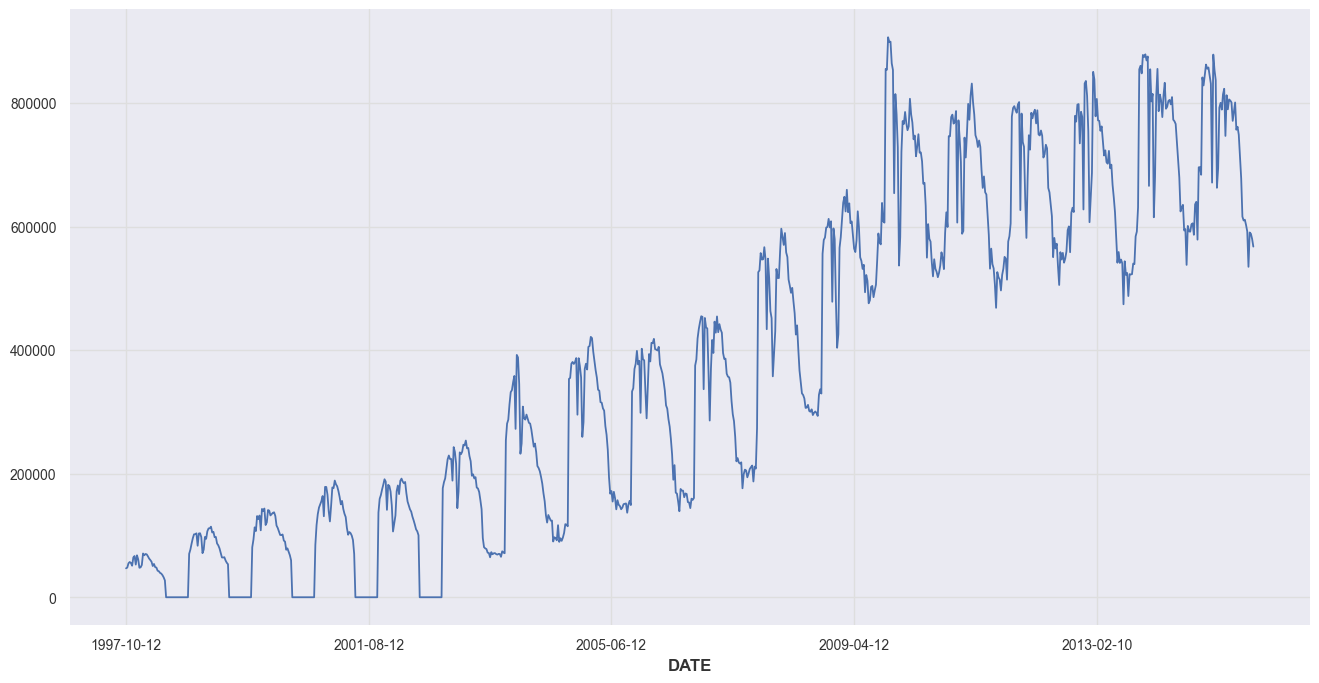

In [45]:
train_df['color'] = 'b'
train_df.set_index(time_col)[target_col].plot(figsize=figsize, color=train_df['color']);

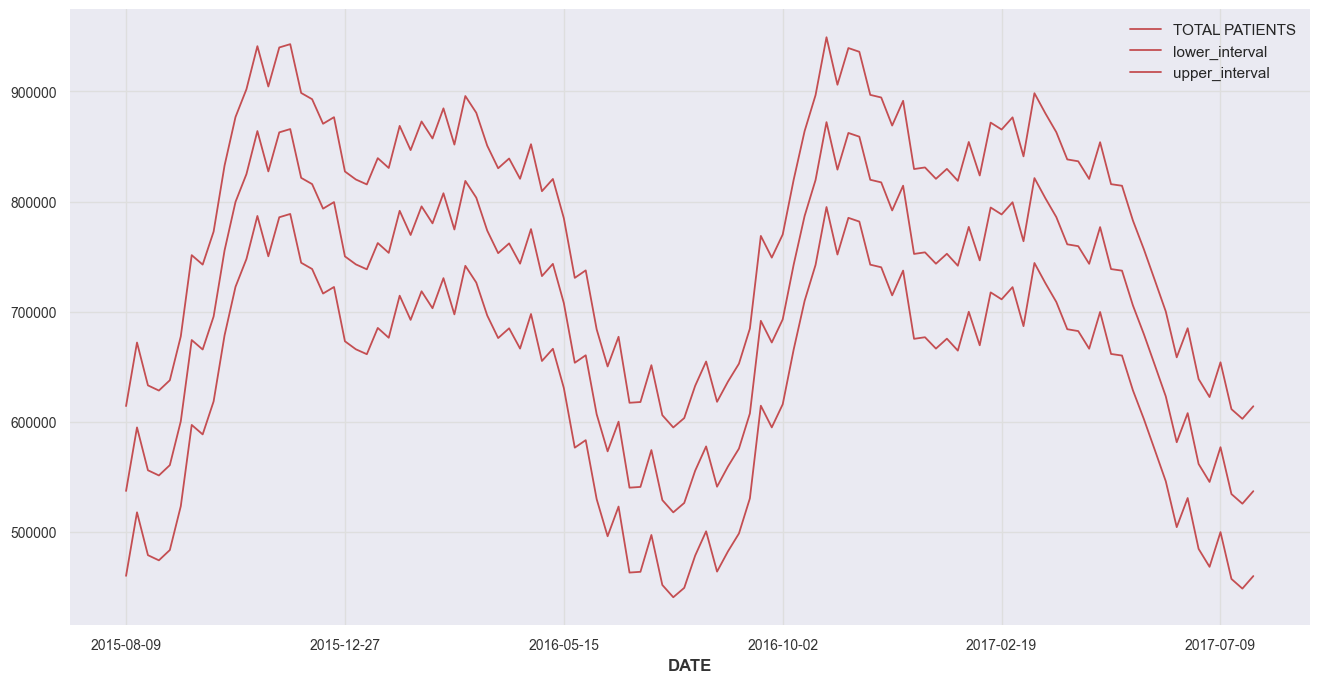

In [46]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and forecast sets

In [47]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [48]:
df.shape

(1034, 15)

In [49]:
df.head()

DATE  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 25-49  AGE 25-64  \
0  1997-10-12         1.10148          1.21686    179.0        0.0      157.0   
1  1997-10-19         1.20007          1.28064    199.0        0.0      151.0   
2  1997-10-26         1.37876          1.23906    228.0        0.0      153.0   
3  1997-11-02         1.19920          1.14473    188.0        0.0      193.0   
4  1997-11-09         1.65618          1.26112    217.0        0.0      162.0   

   AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  NUM. OF PROVIDERS  TOTAL PATIENTS  \
0     205.0        0.0    29.0     570.0              192.0         46842.0   
1     242.0        0.0    23.0     615.0              191.0         48023.0   
2     266.0        0.0    34.0     681.0              219.0         54961.0   
3     236.0        0.0    36.0     653.0              213.0         57044.0   
4     280.0        0.0    41.0     700.0              213.0         55506.0   

  color  lower_interval  upper_interval  
0     b             NaN             NaN  
1     b             NaN             NaN  
2     b             NaN             NaN  
3     b             NaN             NaN  
4     b             NaN             NaN

In [50]:
df.tail()

DATE  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 25-49  \
1029  2017-07-02             NaN              NaN      NaN        NaN   
1030  2017-07-09             NaN              NaN      NaN        NaN   
1031  2017-07-16             NaN              NaN      NaN        NaN   
1032  2017-07-23             NaN              NaN      NaN        NaN   
1033  2017-07-30             NaN              NaN      NaN        NaN   

      AGE 25-64  AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  NUM. OF PROVIDERS  \
1029        NaN       NaN        NaN     NaN       NaN                NaN   
1030        NaN       NaN        NaN     NaN       NaN                NaN   
1031        NaN       NaN        NaN     NaN       NaN                NaN   
1032        NaN       NaN        NaN     NaN       NaN                NaN   
1033        NaN       NaN        NaN     NaN       NaN                NaN   

      TOTAL PATIENTS color  lower_interval  upper_interval  
1029   545487.343757     r   468415.115575   622559.571939  
1030   577008.755636     r   499936.527454   654080.983818  
1031   534491.230637     r   457419.002455   611563.458819  
1032   525733.165957     r   448660.937776   602805.394139  
1033   537113.899884     r   460041.671702   614186.128066

Plot original dataset with the MAUQ Outputs

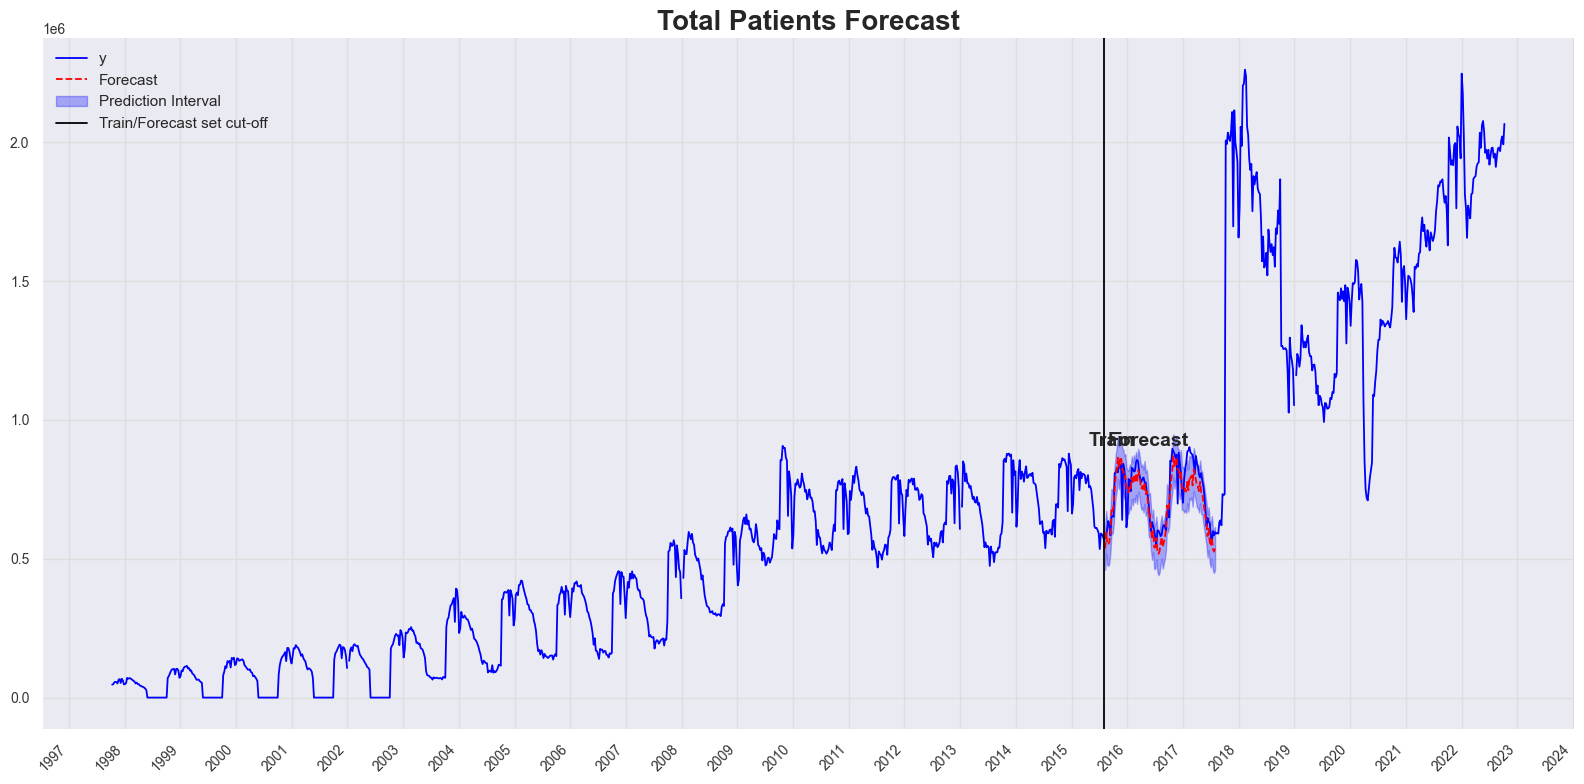

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df[time_col] = pd.to_datetime(df[time_col])
forecast_df[time_col] = pd.to_datetime(forecast_df[time_col])

plt.figure(figsize=figsize)

dataset['DATE'] = pd.to_datetime(dataset['DATE'], format='%Y-%m')

plt.plot(dataset[time_col], dataset[target_col], color='blue', label='y')
# plt.plot(df[time_col], df[target_col], color='blue', label='y')

plt.plot(forecast_df[time_col], forecast_df[target_col], color='red', linestyle='dashed', label='Forecast')

plt.fill_between(forecast_df[time_col], forecast_df['lower_interval'], forecast_df['upper_interval'],
                 color='blue', alpha=0.3, label='Prediction Interval')

plt.axvline(x=df[time_col].iloc[len(train_df)-1], color='black', label='Train/Forecast set cut-off')

plt.text(df[time_col].iloc[len(train_df)-15], df[target_col].max(), 'Train', fontweight='bold', fontsize=14)
plt.text(df[time_col].iloc[len(train_df)+2], df[target_col].max(), 'Forecast', fontweight='bold', fontsize=14)

# Format x-axis to show years clearly
ax = plt.gca()

# Display a tick every year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adjust label rotation and alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.title('Total Patients Forecast', fontweight='bold', fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()
